# Setup

In [5]:
#ausführen!!!
 
import matplotlib.pyplot as plt
 
import pandas as pd
import itertools
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from itertools import combinations
 
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
 
from sklearn.model_selection import cross_val_score
 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
 
import folium #for the map view of all airports
 
#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')
allAirports = pd.read_csv('hopefullyAllAirports.csv')

# Stage 1 strstr(Analysis)
interesting charts


data head:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

data shape:
(539383, 9)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Le

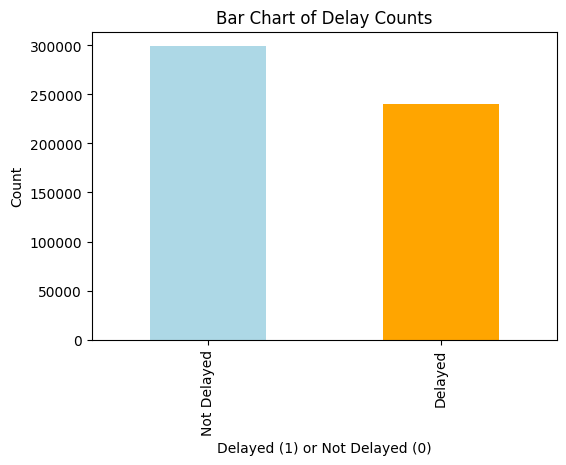

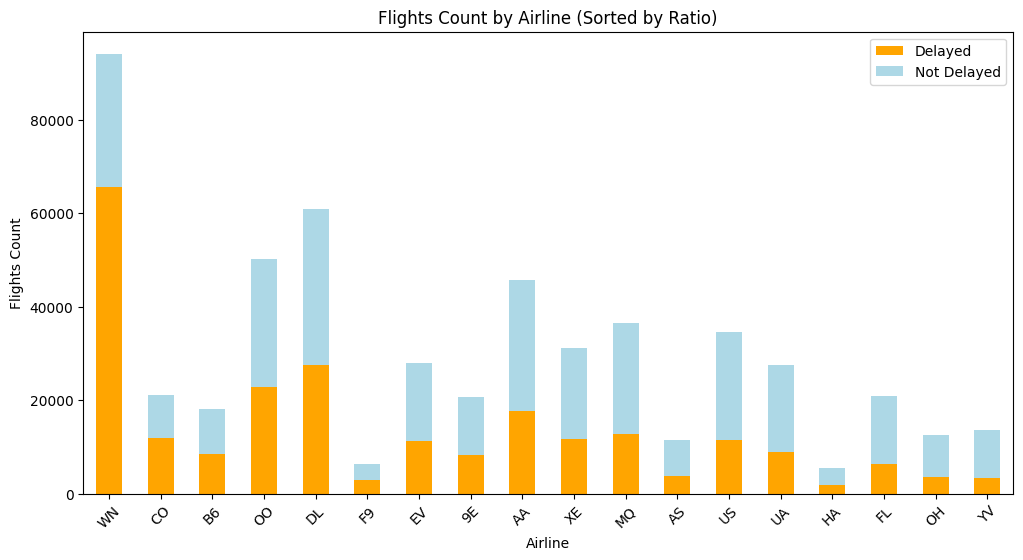

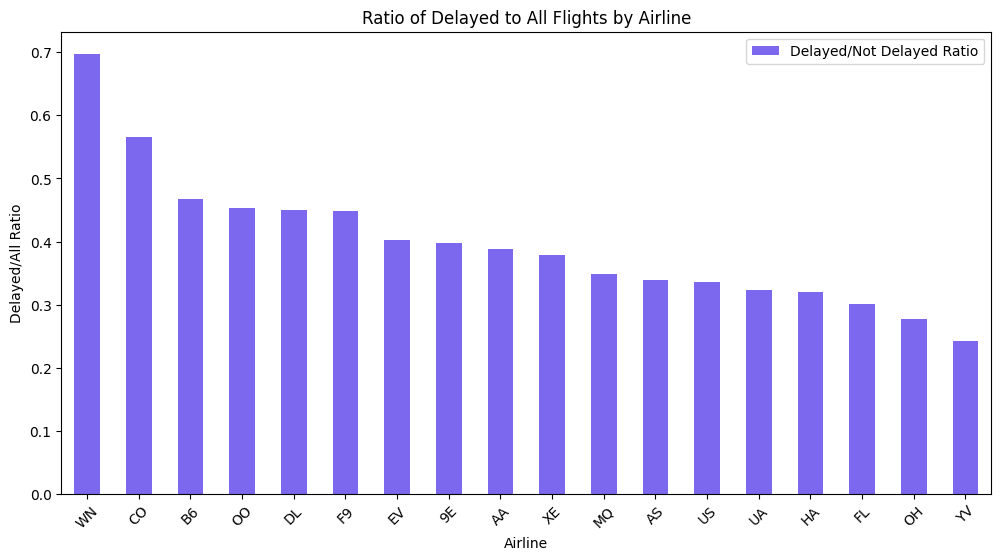

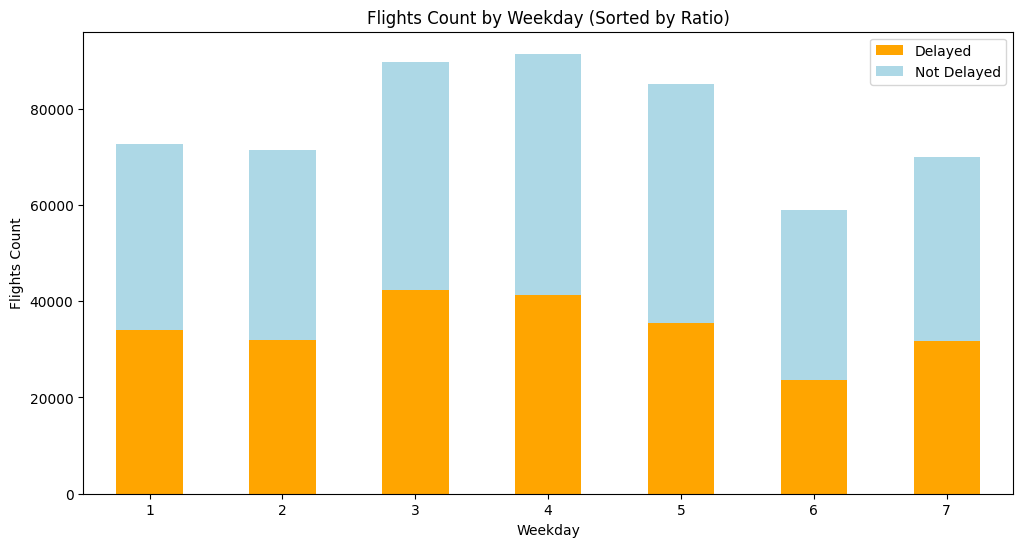

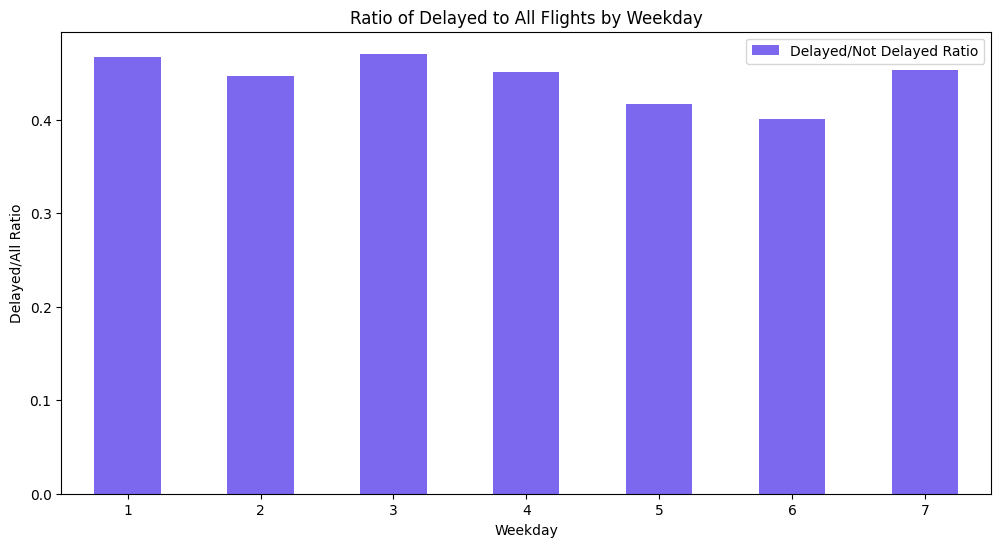

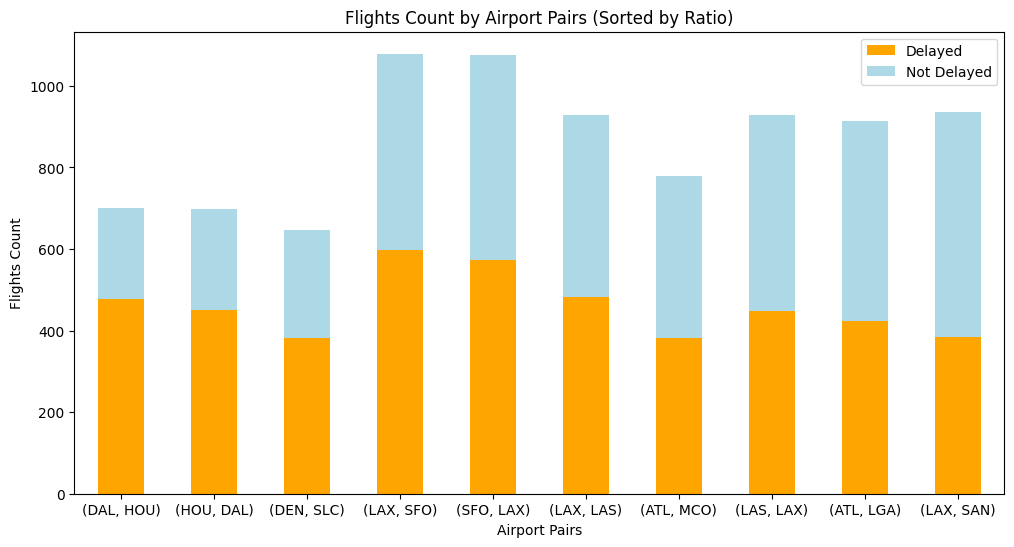

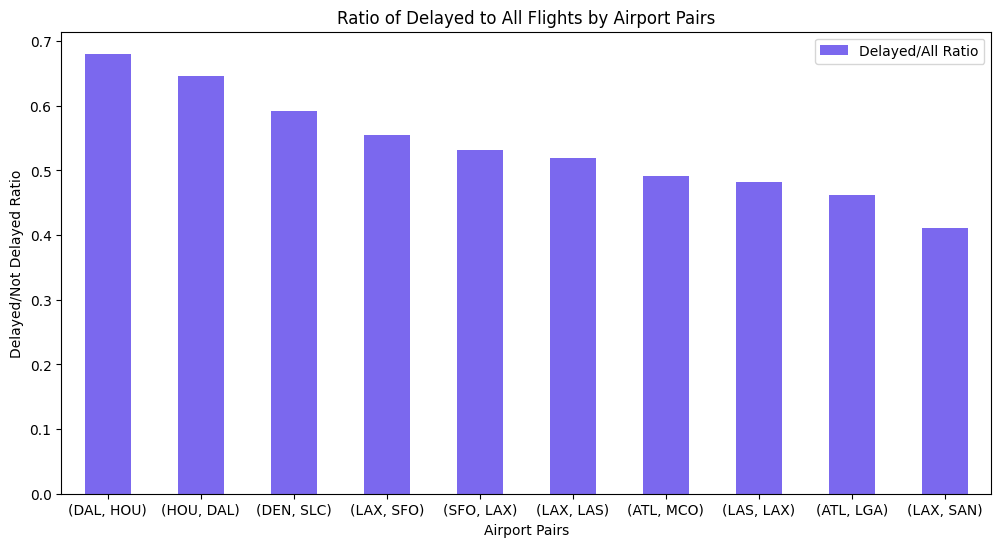

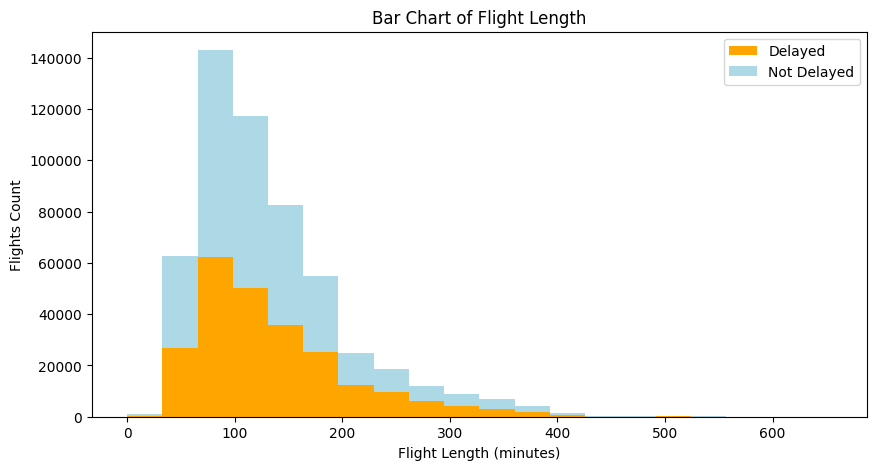

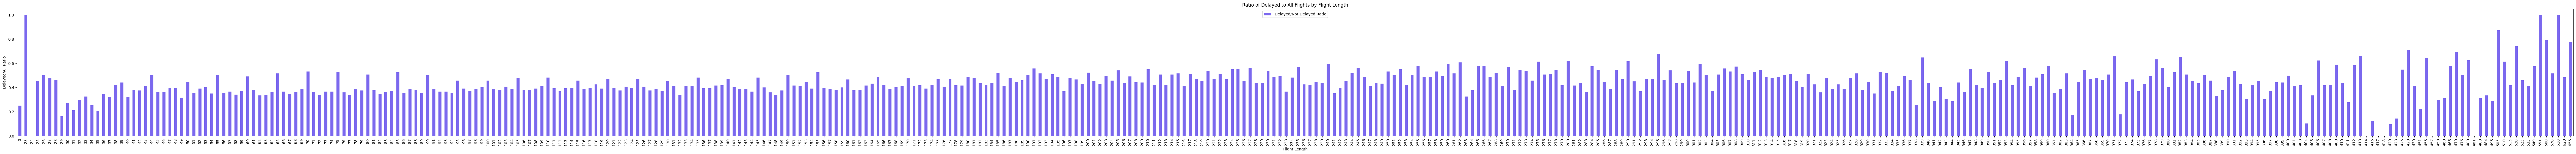

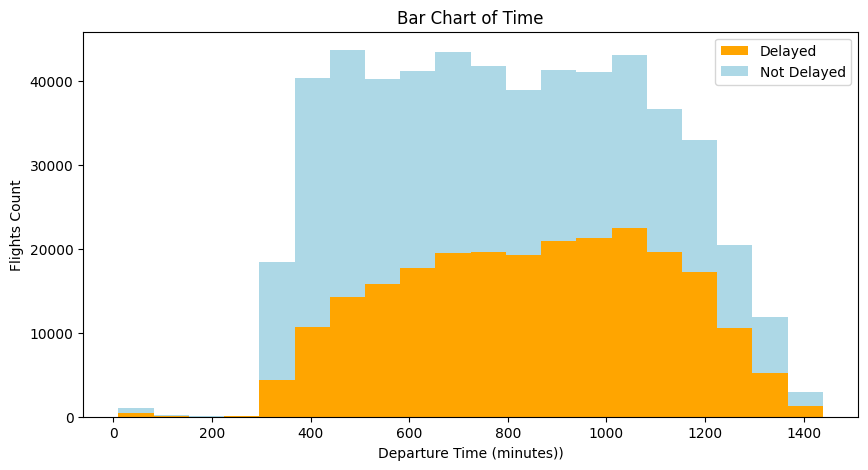

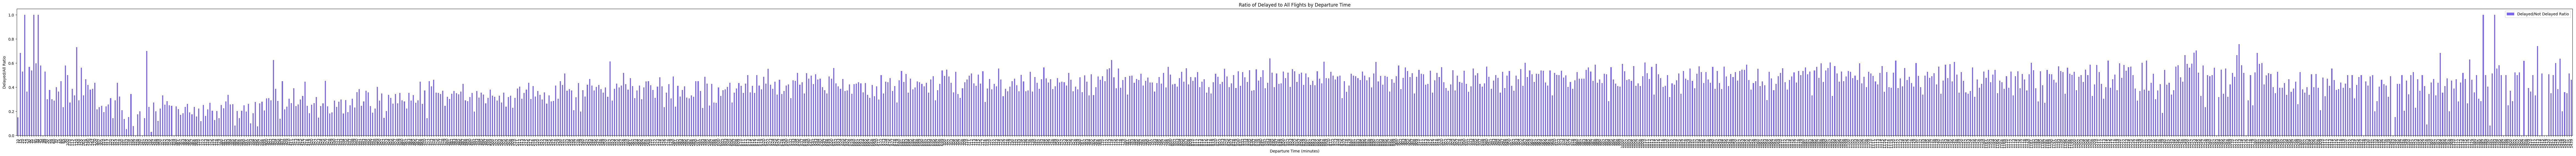

In [2]:
print("\ndata head:")
print(df.head()) #Check table composition

print("\ndata shape:")
print(df.shape) #How many entries are there? (Get height and width of Dataset)

print("\ndata info:")
print(df.info()) #Check for empty datatuple

print("\ndata discription:")
print(df.describe()) #Data visualization -> Mean etc.

#Outliers -> Only binary decision -> no problem
duplicate_values = df.duplicated()
if duplicate_values.any:
    print("\nNo duplicates")
else:    
    print("\nDuplicates found")
    print(duplicate_values)

#------------------------------------
duplicate_values = df['id'].duplicated()
if duplicate_values.any:
    print("\nNo duplicates id")
else:    
    print("\nDuplicates found id")
    print(duplicate_values)

#------------------------------------

colors = ['orange', 'lightblue']

# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()
print(delay_counts)

plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color=['lightblue', 'orange']) 
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()


#2 Chart of Country and Delay Count
delay_counts_by_airline = df.groupby('Airline')['Delay'].agg(['sum', 'count'])
delay_counts_by_airline['ratio'] = delay_counts_by_airline['sum'] / delay_counts_by_airline['count']
delay_counts_by_airline = delay_counts_by_airline.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(12, 6))
delay_counts_by_airline['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(delay_counts_by_airline['count'] - delay_counts_by_airline['sum']).plot(kind='bar', bottom=delay_counts_by_airline['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Airline')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airline (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
delay_counts_by_airline['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Airline')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Airline')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=45)
plt.show()

# 3. Bar Chart of Day of the Week vs. Delay Counts
day_counts = df.groupby('DayOfWeek')['Delay'].agg(['sum', 'count'])
day_counts['ratio'] = day_counts['sum'] / day_counts['count']
day_counts = day_counts.sort_values(by='DayOfWeek', ascending=True)

plt.figure(figsize=(12, 6))
day_counts['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(day_counts['count'] - day_counts['sum']).plot(kind='bar', bottom=day_counts['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Weekday')
plt.ylabel('Flights Count')
plt.title('Flights Count by Weekday (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
day_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Weekday')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Weekday')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=0)
plt.show()


# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].agg(['sum', 'count']).nlargest(10, 'sum')
airport_pairs_counts['ratio'] = airport_pairs_counts['sum'] / airport_pairs_counts['count']
airport_pairs_counts = airport_pairs_counts.sort_values(by='ratio', ascending=False)

plt.figure(figsize=(12, 6))
airport_pairs_counts['sum'].plot(kind='bar', color=colors[0], label='Delayed')
(airport_pairs_counts['count'] - airport_pairs_counts['sum']).plot(kind='bar', bottom=airport_pairs_counts['sum'], color=colors[1], label='Not Delayed')
plt.xlabel('Airport Pairs')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airport Pairs (Sorted by Ratio)')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(12, 6))
airport_pairs_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Airport Pairs')
plt.ylabel('Delayed/Not Delayed Ratio')
plt.title('Ratio of Delayed to All Flights by Airport Pairs')
plt.legend(['Delayed/All Ratio'])
plt.xticks(rotation=0)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Length'], df[df['Delay'] == 0]['Length']], bins=20, color=colors, stacked=True)
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Flight Length')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

length_counts = df.groupby(['Length'])['Delay'].agg(['sum', 'count'])
length_counts['ratio'] = length_counts['sum'] / length_counts['count']
length_counts = length_counts.sort_values(by='Length', ascending=True)
# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(120, 6))
length_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Flight Length')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Flight Length')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=90)
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Time'], df[df['Delay'] == 0]['Time']], bins=20, color=colors, stacked=True)
plt.xlabel('Departure Time (minutes))')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Time')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

time_counts = df.groupby(['Time'])['Delay'].agg(['sum', 'count'])
time_counts['ratio'] = time_counts['sum'] / time_counts['count']
time_counts = time_counts.sort_values(by='Time', ascending=True)
# Ratio of Delayed to Not Delayed Flights by Airline
plt.figure(figsize=(120, 6))
time_counts['ratio'].plot(kind='bar', color="mediumslateblue")
plt.xlabel('Departure Time (minutes)')
plt.ylabel('Delayed/All Ratio')
plt.title('Ratio of Delayed to All Flights by Departure Time')
plt.legend(['Delayed/Not Delayed Ratio'])
plt.xticks(rotation=90)
plt.show()




## Map all Airports using folium  

In [3]:
dfFrom = df["AirportFrom"].unique()
dfTo = df["AirportTo"].unique()

# Concatenate those two arrays to one
dfAirports = np.concatenate((dfFrom, dfTo), axis=None)

# Remove duplicates
dfAirports = np.unique(dfAirports)
print("\nAirports count:")
print(dfAirports.shape)

# Convert dfAirports to a DataFrame
dfAirports = pd.DataFrame({'iata_code': dfAirports})

# Convert 'iata_code' columns to strings
dfAirports['iata_code'] = dfAirports['iata_code'].astype(str)
allAirports['iata_code'] = allAirports['iata_code'].astype(str)

# Merge dataframes based on the 'iata_code' column
merged_dataframe = pd.merge(dfAirports, allAirports, on='iata_code', how='left')

print("\nmerged_dataframe:")
print(merged_dataframe.shape)


# Extract latitude and longitude from the 'coordinates' column
merged_dataframe[['longitude', 'latitude']] = merged_dataframe['coordinates'].str.split(', ', expand=True).astype(float)

# Create a folium map centered around the first entry
m = folium.Map(location=[merged_dataframe['latitude'].iloc[0], merged_dataframe['longitude'].iloc[0]], zoom_start=10)

# Add markers for each entry
for index, row in merged_dataframe.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m




Airports count:
(293,)

merged_dataframe:
(293, 12)


# Stage 2 (df Preperation)

In [6]:
#ausführen!!!
# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'
X = df[features]
y = df[target]

#Preprossing of the data
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

encoder = preprocessing.OrdinalEncoder()
encoded = pd.DataFrame(encoder.fit_transform(X[['Airline', 'AirportFrom', 'AirportTo']]), columns = encoder.get_feature_names_out(['Airline', 'AirportFrom', 'AirportTo']))

X = X.drop(columns = ['Airline', 'AirportFrom', 'AirportTo'])
X = X.join(encoded)

# Separate continuous and categorical columns
continuous_cols = ['DayOfWeek', 'Time', 'Length']
categorical_cols = [col for col in X.columns if col not in continuous_cols]

# Apply StandardScaler only to continuous columns
scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

        DayOfWeek      Time    Length  Airline  AirportFrom  AirportTo
0       -0.485552 -2.833092  1.038237      4.0        253.0      135.0
1       -0.485552 -2.833092  1.280689     14.0        217.0       60.0
2       -0.485552 -2.815110  0.467761      1.0        154.0       80.0
3       -0.485552 -2.815110  0.895618      1.0        253.0       80.0
4       -0.485552 -2.779144  0.995451      2.0         14.0      252.0
...           ...       ...       ...      ...          ...        ...
539378   0.559019  2.288369  2.763925      4.0        203.0      264.0
539379   0.559019  2.288369  2.464425      8.0        252.0       16.0
539380   0.559019  2.288369  1.751331      8.0        253.0      184.0
539381   0.559019  2.288369  2.578520     13.0        128.0      253.0
539382   0.559019  2.288369  2.407378     14.0        154.0      216.0

[539383 rows x 6 columns]
[1 1 1 ... 0 1 1]


## KNN

KNN ohne Kreuzvalidierung

In [4]:
#K-Nearest-Neighbors ohne Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

k_range = 20 #rule of thumb 1-20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_test) 
    accuracy = accuracy_score(y_test, predicted_knn)
    accuracies.append(accuracy)
    precision = precision_score(y_test, predicted_knn, average='weighted')
    recall = recall_score(y_test, predicted_knn, average='weighted')
    f1 = f1_score(y_test, predicted_knn, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(k)

plt.subplot(1, 2, 1)
plt.plot(k_count, accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')
plt.title('k vs. Metrics')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.tight_layout()
plt.savefig("knn.pdf")
plt.show()


1
2


KNN mit Kreuzvalidierung

In [ ]:
#KNN mit Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
mean_accuracies = []

k_range = 20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) ALT!
    knn_estimator.fit(X_train, y_train) 
    predicted_knn = knn_estimator.predict(X_test) 

    scores = cross_val_score(knn_estimator, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

    precision = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
    recall = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
    f1 = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(k)

plt.figure(figsize=(10, 6))

plt.plot(k_count, mean_accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')

plt.title('Metrics vs. k (Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.savefig("knn_kreuz.pdf")
plt.show()


KNN ohne Kreuzvalidierung mit Loop

In [ ]:
data = []

k_range = 20
for k in range(1, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
        knn_estimator.fit(x_run_train, y_train)
        predicted_knn = knn_estimator.predict(x_run_test)
        accuracy = accuracy_score(y_test, predicted_knn)
        precision = precision_score(y_test, predicted_knn, average='weighted')
        recall = recall_score(y_test, predicted_knn, average='weighted')
        f1 = f1_score(y_test, predicted_knn, average='weighted')
        average = (accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), accuracy, precision, recall, f1, average])
    
    print(k)


In [ ]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('K vs Average')
plt.xlabel('K')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


KNN mit Kreuzvalidierung mit Loop

In [ ]:
data = []

k_range = 20
for k in range(1, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) 
        knn_estimator.fit(X_train, y_train) 
        predicted_knn = knn_estimator.predict(x_run_test)
        predicted_knn = knn_estimator.predict(X_test) 
        
        scores = cross_val_score(knn_estimator, x_run_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
        mean_accuracy = np.mean(scores)
        precision = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
        recall = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
        f1 = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
        average = (mean_accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), mean_accuracy, precision, recall, f1, average])
    print(k)


In [ ]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('Max Tree Depth vs Average')
plt.xlabel('Max Tree Depth')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_kreuz_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


KNN mit 9

In [ ]:
#KNN mit 9
#KNN mit Kreuzvalidierung
k = 9
knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) ALT!
knn_estimator.fit(X_train, y_train) 
predicted_knn = knn_estimator.predict(X_test) 

scores = cross_val_score(knn_estimator, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
mean_accuracy = np.mean(scores)

precision = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
recall = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
f1 = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))

print(mean_accuracy)
print(precision)
print(recall)
print(f1)
print((f1+ mean_accuracy)/2)


KNN mit 9 mit Loop ohne Kreuzvalidierung

In [ ]:
data = []

k_range = 9
for k in range(9, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
        knn_estimator.fit(x_run_train, y_train)
        predicted_knn = knn_estimator.predict(x_run_test)
        accuracy = accuracy_score(y_test, predicted_knn)
        precision = precision_score(y_test, predicted_knn, average='weighted')
        recall = recall_score(y_test, predicted_knn, average='weighted')
        f1 = f1_score(y_test, predicted_knn, average='weighted')
        average = (accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), accuracy, precision, recall, f1, average])
    
    print(k)

#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('K vs Average')
plt.xlabel('K')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_kreuz_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


KNN mit 9 mit Loop mit Kreuzvalidierung

In [ ]:
data = []

k_range = 9
for k in range(9, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) 
        knn_estimator.fit(X_train, y_train) 
        predicted_knn = knn_estimator.predict(x_run_test)
        predicted_knn = knn_estimator.predict(X_test) 
        
        scores = cross_val_score(knn_estimator, x_run_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
        mean_accuracy = np.mean(scores)
        precision = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
        recall = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
        f1 = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
        average = (mean_accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), mean_accuracy, precision, recall, f1, average])
    print(k)

#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('Max Tree Depth vs Average')
plt.xlabel('Max Tree Depth')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_kreuz2_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


## Decision Tree

In [7]:
max_tree_depth = 17  # You can adjust this value as needed

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
])

# Fit the classifier on the entire training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

print("Average:",(f1+cv_scores.mean())/2)

Cross-Validation Scores: [0.64090056 0.64147577 0.64205513 0.64294736 0.64271561]
Mean CV Accuracy: 0.6420188852955157
Test Set Accuracy: 0.6460784041083827
Precision: 0.6214978714978715
Recall: 0.523167631984666
F1-Score: 0.5681093187936924
Average: 0.605064102044604


## Implementation for the DT that loops all col combinations and goes from 1 --> max tree depth

In [8]:
# For loop code DT
# Get all combinations of columns
data = []
for max_tree_depth in range(17, 18):

    big_data = []

    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(itertools.combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Create a Decision Tree classifier within a pipeline
        clf = Pipeline([
            ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
        ])

        # Train the classifier on the training set with selected columns
        clf.fit(x_run_train, y_train)

        # Make predictions on the testing set with selected columns
        y_pred = clf.predict(x_run_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        # Calculate and print precision, recall, and f1-score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Perform cross-validation

        cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
        mean_accuracy = cv_scores.mean()

        average = (mean_accuracy + f1) / 2

        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([max_tree_depth,str(combination), accuracy, precision, recall, f1, mean_accuracy])

    # add the value with the highest average to data
    print(big_data)

    max_average = 0
    for i in range(0, len(big_data)):
        if big_data[i][-1] > max_average:
            max_average = big_data[i][-1]
            j = i
    data.append(big_data[j])



e:\Anaconda\envs\ATIT\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### damit man sieht, dass man immer den ersten max wer nehmen muss, deshalb kein >=

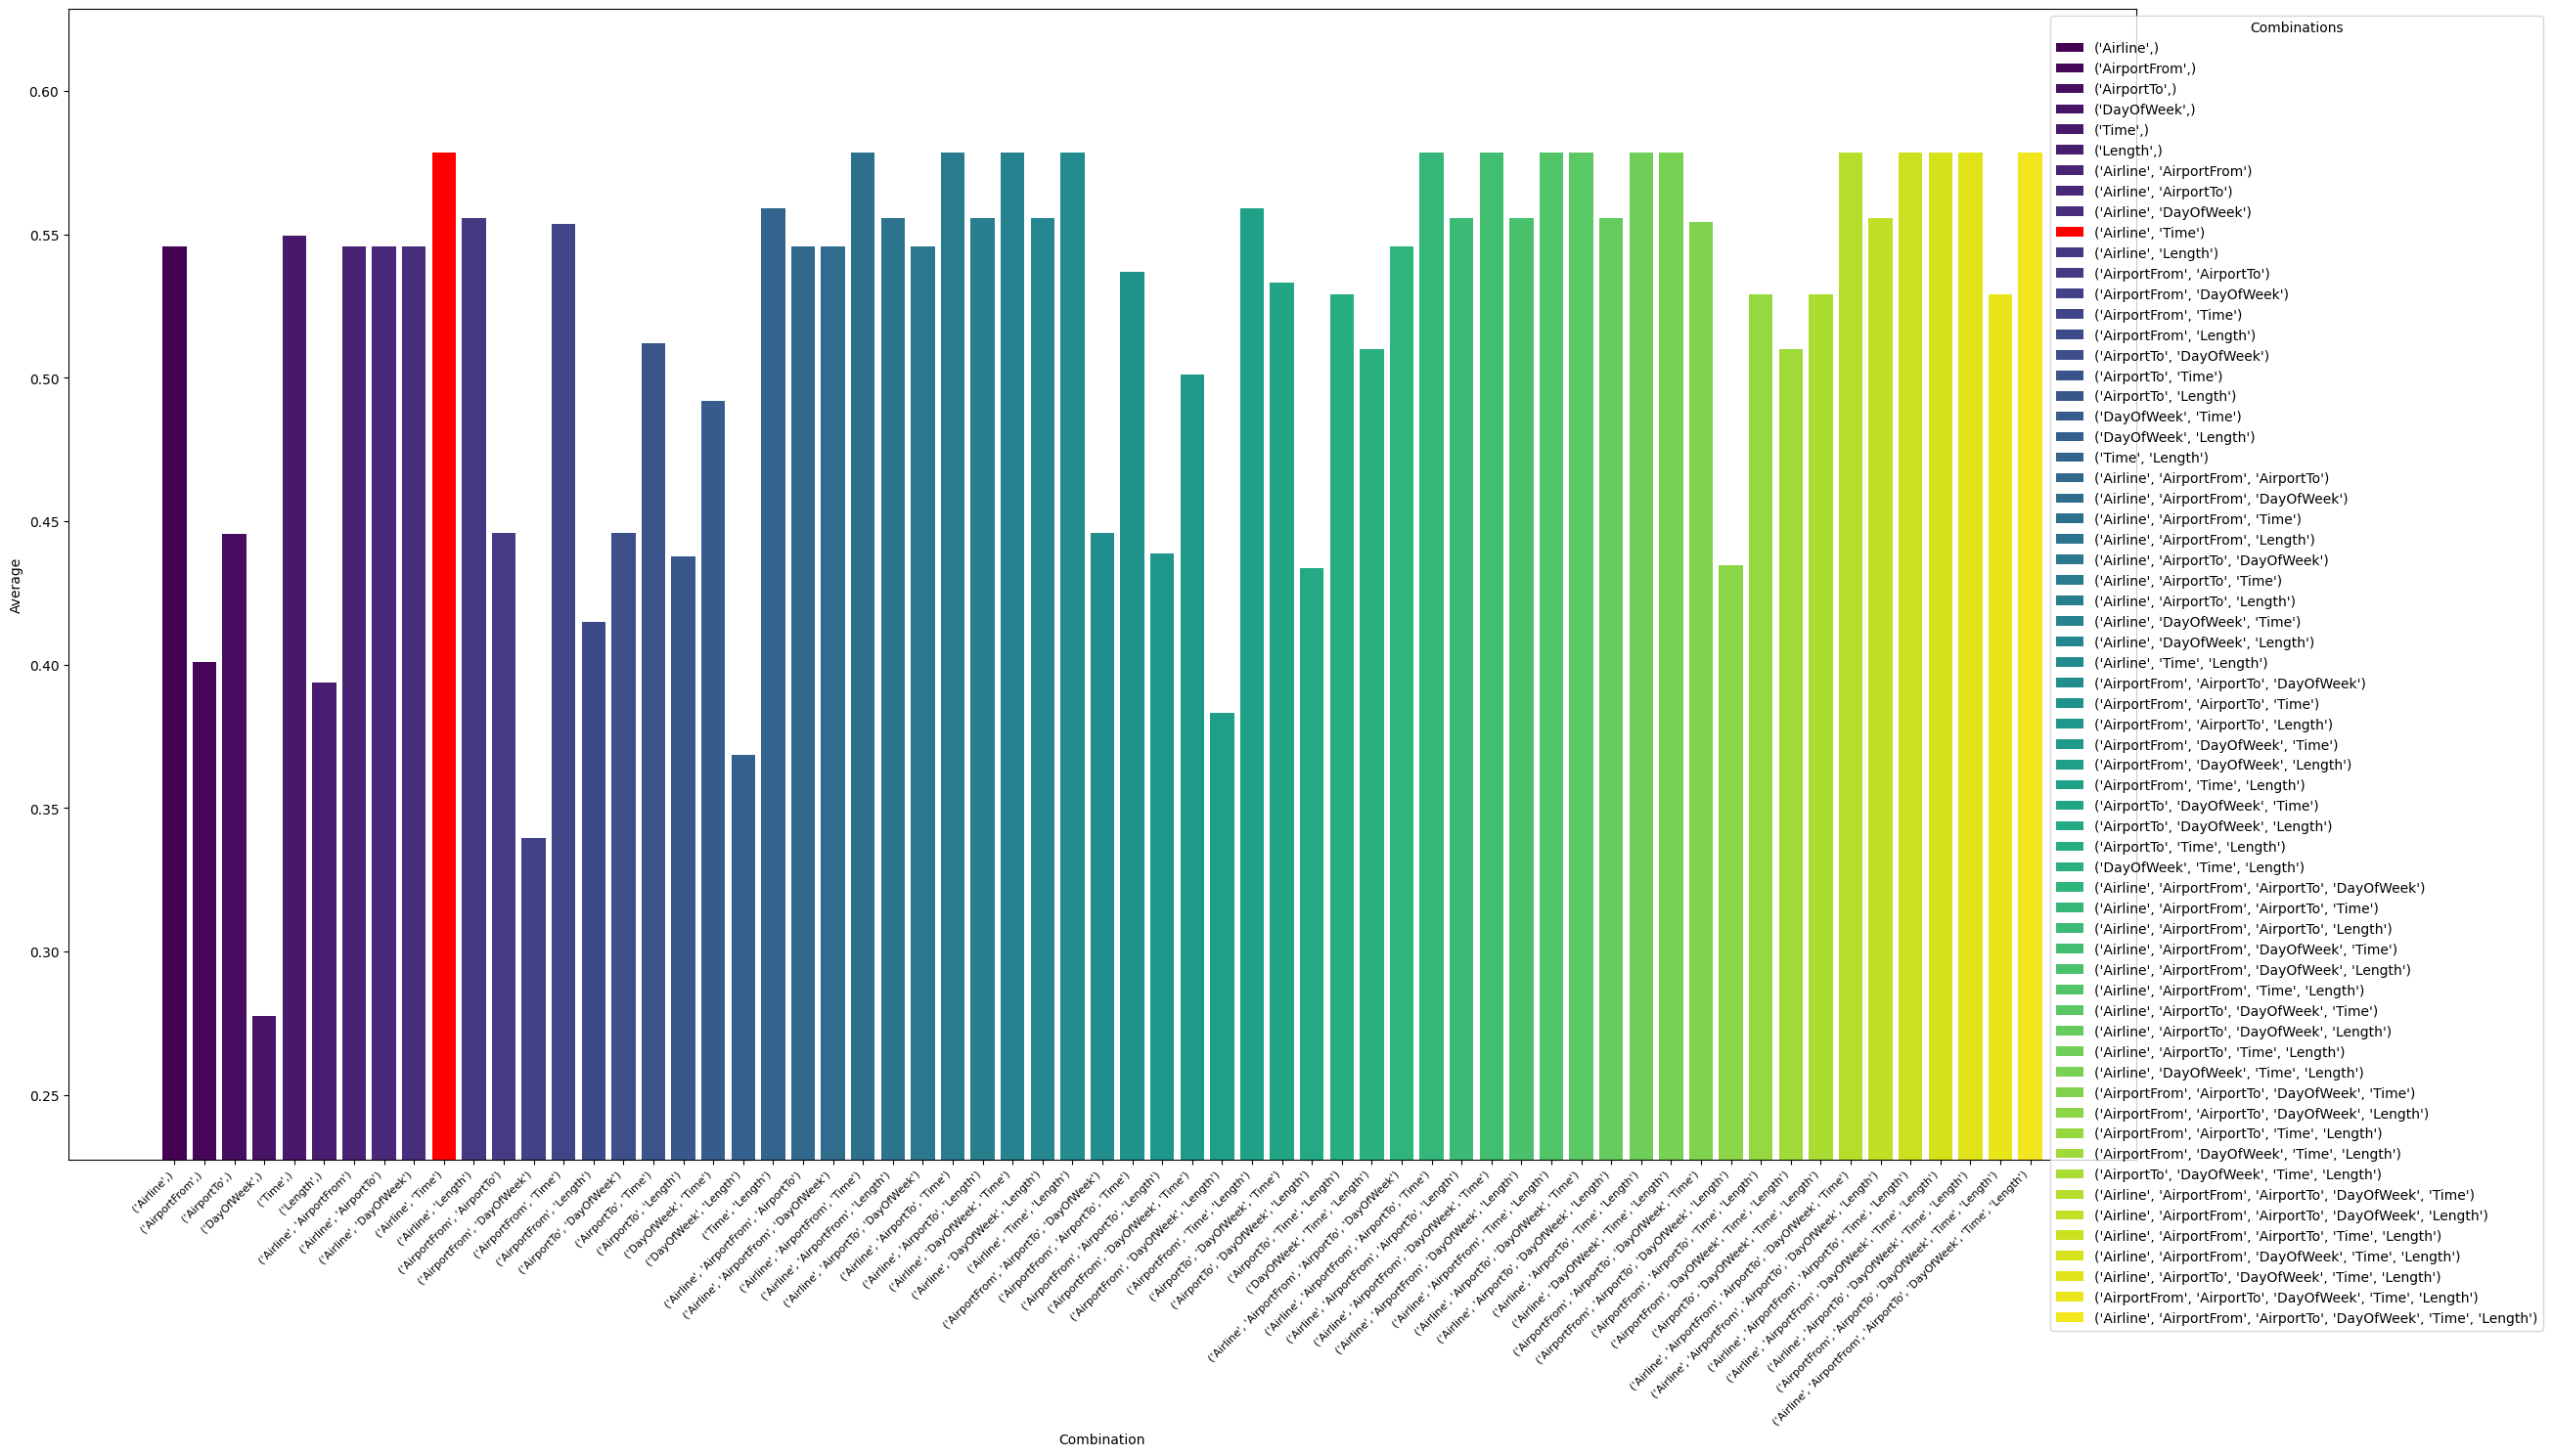

In [15]:
#big_data from depth 4
#big_data = [[4, "('Airline',)", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('AirportFrom',)", 0.5616952640507245, 0.5251106272388846, 0.1557564898537439, 0.24025066281031576, 0.40097296343052014], [4, "('AirportTo',)", 0.562103135978939, 0.5169200588523786, 0.24155173132213842, 0.329248725630795, 0.445675930804867], [4, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [4, "('Time',)", 0.5744598014405294, 0.5215368143633669, 0.5277303220967541, 0.5246152890251228, 0.5495375452328262], [4, "('Length',)", 0.5593592702800412, 0.5170508948957796, 0.14625609400391684, 0.22801461632155912, 0.3936869433008001], [4, "('Airline', 'AirportFrom')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportTo')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('AirportFrom', 'AirportTo')", 0.5620289774465363, 0.5167074527252503, 0.24194758114921455, 0.32957302796815807, 0.44580100270734724], [4, "('AirportFrom', 'DayOfWeek')", 0.5587845416539207, 0.5329066141473823, 0.0676486520271678, 0.12005694108077128, 0.33942074136734596], [4, "('AirportFrom', 'Time')", 0.5775466503517895, 0.524761574121347, 0.5353556398183258, 0.5300056721497447, 0.5537761612507671], [4, "('AirportFrom', 'Length')", 0.56409614653726, 0.5303124610979709, 0.1775073961415059, 0.265984015984016, 0.415040081260638], [4, "('AirportTo', 'DayOfWeek')", 0.5611946939570066, 0.5145678141667034, 0.24321846743614317, 0.33031053264483273, 0.44575261330091964], [4, "('AirportTo', 'Time')", 0.5793171853129027, 0.5387670420865441, 0.37872411350472934, 0.44478700237343705, 0.5120520938431699], [4, "('AirportTo', 'Length')", 0.5635121480945892, 0.5222662169428558, 0.2225926080253344, 0.31214666569279087, 0.43782940689369], [4, "('DayOfWeek', 'Time')", 0.5751828471314553, 0.5367447846112164, 0.3302012583857661, 0.4088692825632691, 0.4920260648473622], [4, "('DayOfWeek', 'Length')", 0.5582654319271022, 0.5172310458495655, 0.10787949497895746, 0.1785240221344964, 0.3683947270307993], [4, "('Time', 'Length')", 0.5800587706369291, 0.5269040395976369, 0.5500229176215675, 0.5382153269046502, 0.5591370487707896], [4, "('Airline', 'AirportFrom', 'AirportTo')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'AirportTo', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportTo', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek')", 0.5611390750577047, 0.5144254063339647, 0.24332263844326846, 0.33037722238723644, 0.44575814872247055], [4, "('AirportFrom', 'AirportTo', 'Time')", 0.5791781380646477, 0.5311265886407698, 0.46233176382349267, 0.4943472304213681, 0.5367626842430079], [4, "('AirportFrom', 'AirportTo', 'Length')", 0.5633452913966832, 0.5215690063281967, 0.2249468727863661, 0.3143277194718992, 0.4388365054342912], [4, "('AirportFrom', 'DayOfWeek', 'Time')", 0.5774817616359372, 0.5387053399923165, 0.3505771073794741, 0.4247419037281975, 0.5011118326820674], [4, "('AirportFrom', 'DayOfWeek', 'Length')", 0.5636233858931932, 0.5418063230365069, 0.12460935872328013, 0.20261869674949606, 0.3831210413213446], [4, "('AirportFrom', 'Time', 'Length')", 0.5800587706369291, 0.5269040395976369, 0.5500229176215675, 0.5382153269046502, 0.5591370487707896], [4, "('AirportTo', 'DayOfWeek', 'Time')", 0.578288235675816, 0.5306152379555621, 0.45226884453518895, 0.4883195177091183, 0.5333038766924671], [4, "('AirportTo', 'DayOfWeek', 'Length')", 0.5611205354246039, 0.5161178851754948, 0.21782157589899578, 0.30635118306351183, 0.4337358592440579], [4, "('AirportTo', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('DayOfWeek', 'Time', 'Length')", 0.5775929994345412, 0.5359808102345416, 0.37707821159214966, 0.4427023457182692, 0.5101476725764053], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportFrom', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportTo', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Time')", 0.578149188427561, 0.5254330773002125, 0.5358764948539523, 0.5306034038164003, 0.5543762961219807], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Length')", 0.560953678726698, 0.5154870494122238, 0.2201758406600275, 0.30855924904013193, 0.43475646388341493], [4, "('AirportFrom', 'AirportTo', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('AirportFrom', 'DayOfWeek', 'Time', 'Length')", 0.5775929994345412, 0.5359808102345416, 0.37707821159214966, 0.4427023457182692, 0.5101476725764053], [4, "('AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289]]

# Extrahiere die benötigten Daten
combinations = [str(entry[1]) for entry in big_data]
averages = [entry[-1] for entry in big_data]

# Festlegen von verschiedenen Farben für jeden Balken
colors = plt.cm.viridis(np.linspace(0, 1, len(combinations)))

# Find the index of the maximum average value
max_avg_index = np.argmax(averages)

# Create a list of colors, setting 'red' for the maximum average value and 'viridis' for others
highlighted_colors = ['red' if i == max_avg_index else plt.cm.viridis(i / len(combinations)) for i in range(len(combinations))]

# Plot
fig, ax = plt.subplots(figsize=(26, 15))
bars = ax.bar(combinations, averages, color=highlighted_colors)

# Reduziere die Anzahl der x-Achsenbeschriftungen
x_ticks = range(0, len(combinations), 1)  # Adjust the step size according to your preference
plt.xticks(x_ticks, [combinations[i] for i in x_ticks], rotation=45, ha='right', fontsize=8)  # Rotate labels by 45 degrees

# Set y-axis limits for better visibility
plt.ylim(min(averages) - 0.05, max(averages) + 0.05)

# Achsentitel hinzufügen
plt.xlabel('Combination')
plt.ylabel('Average')

# Farblegende hinzufügen
plt.legend(bars, combinations, title='Combinations', loc='upper right', bbox_to_anchor=(1.2, 1))

# Vergrößere den Abstand zwischen den Balken
plt.tight_layout()

# Diagramm anzeigen
plt.show()

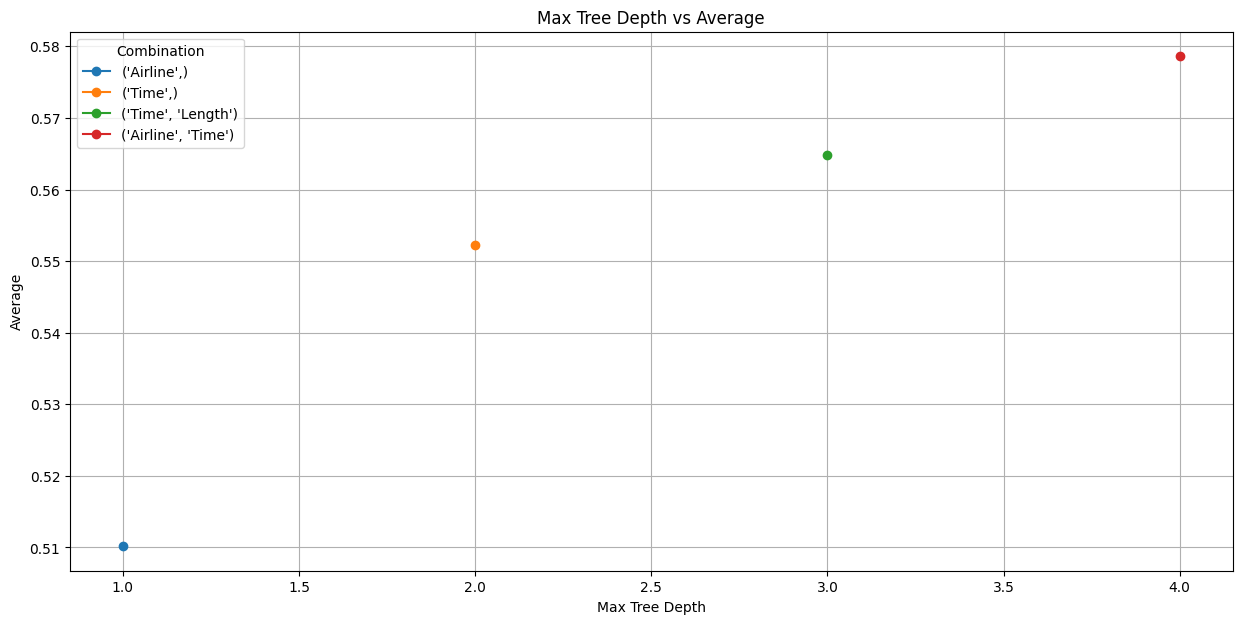


 Data:
  max_tree_depth          combination            accuracy           precision  \
0              1         ('Airline',)  0.5956876813407863  0.5787789443405724   
1              2            ('Time',)  0.5698619724315656  0.5154232701971395   
2              3   ('Time', 'Length')   0.576044940070636  0.5207679459647964   
3              4  ('Airline', 'Time')  0.6309500634982433  0.6135556542004217   

                recall                  f1             average  
0   0.3353681403391808  0.4246669304841049  0.5101773059124456  
1   0.5556064836034835  0.5347610740139165   0.552311523222741  
2   0.5911287970332098   0.553722153374772   0.564883546722704  
3  0.46074836451518814  0.5262844768092144  0.5786172701537289  


In [16]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    max_tree_depth = entry[0]
    average = entry[6]
    combination = entry[1]

    # Plotting
    plt.plot(max_tree_depth, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('Max Tree Depth vs Average')
plt.xlabel('Max Tree Depth')
plt.ylabel('Average')
plt.grid(True)
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['max_tree_depth','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


Max Depth: 14, Accuracy: 0.6501942026567294, Precision: 0.6364119742649014, Recall: 0.4987291137130714, f1: 0.5592206699995328, Average: 0.6047074363281311
Max Depth: 15, Accuracy: 0.6495267758651057, Precision: 0.6327929524603837, Recall: 0.5058335763990166, f1: 0.5622351388277795, Average: 0.6058809573464425
Max Depth: 16, Accuracy: 0.6486461432928242, Precision: 0.6312641406392219, Recall: 0.5057294053918914, f1: 0.5615666678233914, Average: 0.6051064055581078
Max Depth: 17, Accuracy: 0.6461525626407854, Precision: 0.6216209525695613, Recall: 0.523167631984666, f1: 0.5681607348915084, Average: 0.6071566487661468
Max Depth: 18, Accuracy: 0.644910407223041, Precision: 0.6192127921279212, Recall: 0.5244176840701696, f1: 0.5678864723400415, Average: 0.6063984397815413
Max Depth: 19, Accuracy: 0.6395988023397017, Precision: 0.6114601412961107, Recall: 0.5211258802450102, f1: 0.5626905123446375, Average: 0.6011446573421696
Max Depth: 20, Accuracy: 0.636409985446388, Precision: 0.606067931

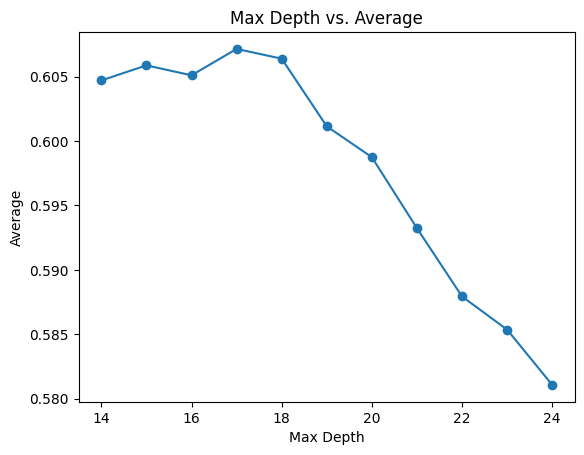

In [ ]:
# just for testing 

# Create arrays to store max_depth and corresponding accuracies
depths = []
averages = []

# Loop through max depths from 1 to 10
for max_tree_depth in range(1, 25):

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracy = cv_scores.mean()

    average = (mean_accuracy + f1) / 2

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}, Average: {average}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    averages.append(average)

# Plotting the graph
plt.plot(depths, averages, marker='o')
plt.title('Max Depth vs. Average')
plt.xlabel('Max Depth')
plt.ylabel('Average')
plt.show()

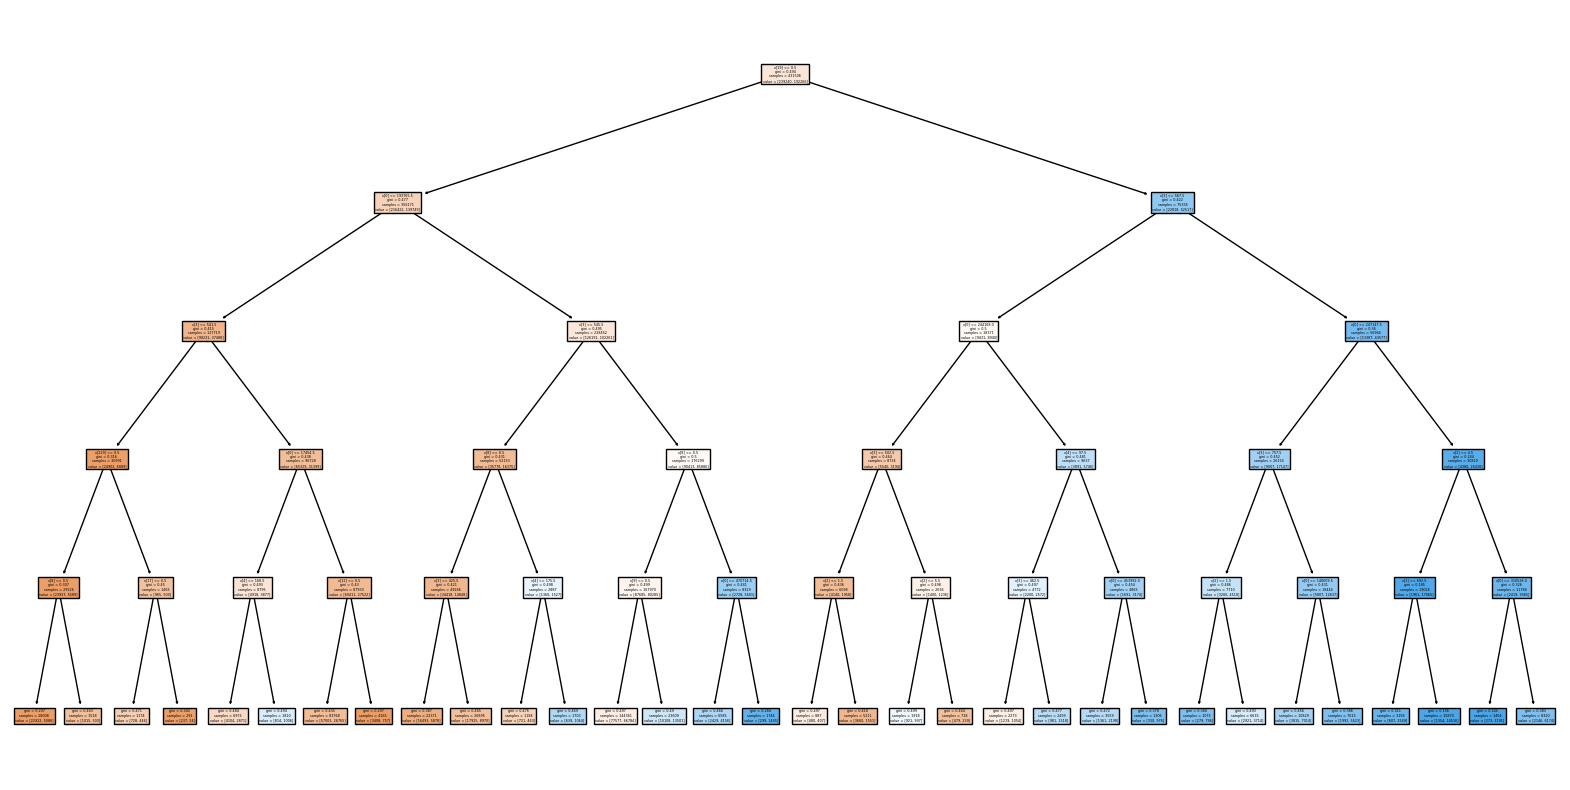

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf['classifier'], filled=True)
plt.savefig("test.pdf")
plt.show()


### Naive Bayes Classifier


NB ohne Cross_Val ohne Loop

In [9]:
#Create an NB Classifier
nb_estimator = GaussianNB()

# Train the classifier on the training set
nb_estimator.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = nb_estimator.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)


Accuracy: 0.5819034641304448
Precision: 0.5450780106505558
Recall: 0.36466102754281426
F1 Score: 0.5988772205297175


NB mit Cross_Val ohne Loop

In [23]:
# Create an NB Classifier
nb_estimator = GaussianNB()

# Combine the features and labels into a single dataset
data = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Create StratifiedKFold cross-validator
stratk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='accuracy'))
print("Cross-Validation Accuracy:", cv_accuracy)

cv_precision = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='precision_weighted'))
print("Cross-Validation Precision:", cv_precision)

cv_recall = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='recall_weighted'))
print("Cross-Validation Recall:", cv_recall)

cv_f1 = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='f1_weighted'))
print("Cross-Validation F1:", cv_f1)




Cross-Validation Accuracy: 0.5826064214665554
Cross-Validation Precision: 0.5751279297254934
Cross-Validation Recall: 0.5826064214665554
Cross-Validation F1: 0.5653720190395705


NB mit Loop


In [24]:
data = []
big_data = []
column_combinations = []  # Get all combinations of columns
combination_count = 1
for r in range(1, len(features) + 1):
    column_combinations.extend(combinations(features, r))

# Iterate through each combination
for combination in column_combinations:
    # Create a new DataFrame for the current combination
    x_run_train = X_train[list(combination)].copy()
    x_run_test = X_test[list(combination)].copy()

    # Now you can use x_run for the current iteration
    nb_estimator = GaussianNB()
    nb_estimator.fit(x_run_train, y_train)
    predicted_nb = nb_estimator.predict(x_run_test)
    accuracy = accuracy_score(y_test, predicted_nb)
    precision = precision_score(y_test, predicted_nb, average='weighted')
    recall = recall_score(y_test, predicted_nb, average='weighted')
    f1 = f1_score(y_test, predicted_nb, average='weighted')
    average = (accuracy + f1) / 2

    # Add combination, accuracy, precision, recall, f1 as an array into the data array
    big_data.append([str(combination), accuracy, precision, recall, f1, average])
    print("Combination Count: " + str(combination_count))
    combination_count += 1

print(big_data)
max_average = 0
for i in range(0, len(big_data)):
    if big_data[i][-1] > max_average:
        max_average = big_data[i][-1]
        j = i
data.append(big_data[j])

print(data)

c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 1


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 2


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 3


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 4
Combination Count: 5
Combination Count: 6
Combination Count: 7
Combination Count: 8
Combination Count: 9
Combination Count: 10
Combination Count: 11
Combination Count: 12


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 13
Combination Count: 14
Combination Count: 15
Combination Count: 16
Combination Count: 17
Combination Count: 18
Combination Count: 19
Combination Count: 20
Combination Count: 21
Combination Count: 22
Combination Count: 23
Combination Count: 24
Combination Count: 25
Combination Count: 26
Combination Count: 27
Combination Count: 28
Combination Count: 29
Combination Count: 30
Combination Count: 31
Combination Count: 32
Combination Count: 33
Combination Count: 34
Combination Count: 35
Combination Count: 36
Combination Count: 37
Combination Count: 38
Combination Count: 39
Combination Count: 40
Combination Count: 41
Combination Count: 42
Combination Count: 43
Combination Count: 44
Combination Count: 45
Combination Count: 46
Combination Count: 47
Combination Count: 48
Combination Count: 49
Combination Count: 50
Combination Count: 51
Combination Count: 52
Combination Count: 53
Combination Count: 54
Combination Count: 55
Combination Count: 56
Combination Count: 57
Combinatio

NB mit Cross_Val mit Loop

In [25]:
data = []
big_data = []
column_combinations = []  # Get all combinations of columns
combination_count = 1

for r in range(1, len(features) + 1):
    column_combinations.extend(combinations(features, r))

# Iterate through each combination
for combination in column_combinations:
    # Create a new DataFrame for the current combination
    x_run_train = X_train[list(combination)].copy()
    x_run_test = X_test[list(combination)].copy()

    # Now you can use x_run for the current iteration
    nb_estimator = GaussianNB()

    data = np.concatenate((X_train, X_test), axis=0)
    labels = np.concatenate((y_train, y_test), axis=0)

    # Create StratifiedKFold cross-validator
    stratk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_accuracy = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='accuracy'))
    cv_precision = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='precision_weighted'))
    cv_recall = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='recall_weighted'))
    cv_f1 = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='f1_weighted'))
    average = (cv_accuracy + cv_f1) / 2

    # Add combination, accuracy, precision, recall, f1 as an array into the data array
    big_data.append([str(combination), accuracy, precision, recall, f1, average])
    print("Combination Count: " + str(combination_count))
    combination_count += 1

print(big_data)
max_average = 0
for i in range(0, len(big_data)):
    if big_data[i][-1] > max_average:
        max_average = big_data[i][-1]
        j = i
data.append(big_data[j])

print(data)


Combination Count: 1
Combination Count: 2
Combination Count: 3
Combination Count: 4


KeyboardInterrupt: 

**Random Forests**

In [7]:
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

# Create a Decision Tree classifier within a pipeline
RandomForestCLF = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None)) 
])

# Train the classifier on the training set
RandomForestCLF.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RandomForestCLF.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

####Cross Validation Added

scores = cross_val_score(RandomForestCLF, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
mean_accuracy = np.mean(scores)
print("Mean Accuracy", precision)

precisionCross = np.mean(cross_val_score(RandomForestCLF, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
print("PrecisionCross:", precisionCross)
recallCross = np.mean(cross_val_score(RandomForestCLF, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
print("RecallCross:", recallCross)
f1Cross = np.mean(cross_val_score(RandomForestCLF, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
print("F1-ScoreCross:", f1Cross)

Accuracy: 0.619214475745525
Precision: 0.5745175740868367
Recall: 0.555773157214884
F1-Score: 0.5649899396378271
Mean Accuracy 0.5745175740868367


NameError: name 'knn_estimator' is not defined

In [ ]:

# testing different depths

# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths
for max_tree_depth in range(1, 40):

    # Create a Random Forest classifier within a pipeline
    clf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= max_tree_depth)) 
])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")
    
    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Testing all possible Variations of Collumns

In [11]:
# For loop code DT
# Get all combinations of columns
max_tree_depth =5
data = []
for max_tree_depth in range(1, 5):

    big_data = []

    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(itertools.combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Create a Decision Tree classifier within a pipeline
        RandomForestCLF = Pipeline([
            ('classifier', RandomForestClassifier(max_depth=max_tree_depth,random_state=42)) 
        ])

        # Train the classifier on the training set with selected columns
        RandomForestCLF.fit(x_run_train, y_train)

        # Make predictions on the testing set with selected columns
        y_pred = RandomForestCLF.predict(x_run_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        # Calculate and print precision, recall, and f1-score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        average = (accuracy + f1) / 2

        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([max_tree_depth,str(combination), accuracy, precision, recall, f1, average])

    # add the value with the highest average to data
    print(big_data)

    max_average = 0
    for i in range(0, len(big_data)):
        if big_data[i][-1] > max_average:
            max_average = big_data[i][-1]
            j = i
    data.append(big_data[j])



c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppDa

[[1, "('Airline',)", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('AirportFrom',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('AirportTo',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Time',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Length',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Airline', 'AirportFrom')", 0.5954188566608267, 0.5811007191563886, 0.324909371223801, 0.4167835905659117, 0.5061012236133692], [1, "('Airline', 'AirportTo')", 0.5895974118672191, 0.6200296449055874, 0.20044585191049627, 0.302952058568842, 0.44627473521803057], [1, "('Airline', 'DayOfWeek')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('Airline', 'Time')", 0.6082946318492357, 0.6329535982217283, 0.28476186507771156, 

c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppDa

**Neural Network Test**

In [9]:
neuralnet =MLPClassifier(hidden_layer_sizes = (10, ), learning_rate_init=.1) #Tested with different Layer Numbers
neuralnet.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = neuralnet.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

####Cross Validation Added

scores = cross_val_score(neuralnet, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
mean_accuracy = np.mean(scores)
print("Mean Accuracy", precision)

precisionCross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
print("PrecisionCross:", precisionCross)
recallCross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
print("RecallCross:", recallCross)
f1Cross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
print("F1-ScoreCross:", f1Cross)



Accuracy: 0.5550673452172381
Accuracy: 0.5550673452172381
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Accuracy 0.0
PrecisionCross: 0.30739295492643715
RecallCross: 0.5544302976207502
F1-ScoreCross: 0.39550561436311416
